In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from IPython.display import display, HTML

import warnings 
warnings.simplefilter("ignore")

# Введение в моделирование по методу Монте-Карло

Аналитикам данных часто требуется точно оценить вероятность неопределенных событий. Например, какова вероятность того, что денежные потоки для нового продукта будут демонстрировать положительную чистую приведенную стоимость (ЧПС)? Каков фактор риска инвестиционного портфеля? Метод Монте-Карло позволяет моделировать ситуации, проявляющие неопределенность, и затем воспроизводить их на компьютере тысячи раз.

>Термин "моделирование по методу Монте-Карло" пришел из моделирования на вычислительных машинах, выполнявшегося в 1930-х и 1940-х годах для оценки вероятности успешной цепной реакции, необходимой для взрыва атомной бомбы. Физики, принимавшие участие в этих работах, были большими поклонниками азартных игр, поэтому метод моделирования получил кодовое название Монте-Карло.

### Где применяется моделирование по методу Монте-Карло?
Во многих компаниях моделирование по методу Монте-Карло является важной частью процесса принятия решений. 

- Компания General Motors, например, моделирует для корпорации прогноз по чистой прибыли, по структурным затратам и затратам на приобретение, а также по чувствительности к различным видам риска (таким как изменения процентных ставок и колебания обменного курса).
- Компания Lilly с помощью моделирования определяет оптимальную производственную мощность для каждого лекарственного препарата.
- Компания Proctor&Gamble с помощью метода Монте-Карло моделирует и оптимально хеджирует валютные риски.
- Компания Sears с помощью моделирования определяет, сколько единиц продукции из каждой товарной линии необходимо заказать у поставщиков, например, количество брюк Dockers на этот год.
- Нефтяные и фармацевтические компании моделируют оценку реальных возможностей, например, оценку возможности расширения, заключения сделки или отсрочки проекта.
- Специалисты по финансовому планированию с помощью моделирования по методу Монте-Карло определяют оптимальные инвестиционные стратегии для выхода на пенсию своих клиентов.

***
Автодилер считает, что спрос на модели 2015 г. распределяется по нормальному закону со средним значением 200 и стандартным отклонением 30. Он получает Envoy за 25 000 долларов и продает за 40 000 долларов. Половину автомобилей, не проданных по полной цене, можно продать по 30 000 долларов. Дилер рассматривает варианты заказа на 200, 220, 240, 269, 280 или 300 штук. Сколько автомобилей он должен заказать?

In [3]:
from scipy.stats import norm

In [39]:
np.random.seed(223)
mean, sigma = 200, 30
demand = norm.ppf(np.random.rand(), mean, sigma)

226.93754957603227

In [22]:
unit_cost = 25000
selling_price = 40000
order_quantity = 240
salvage_value = 30000

In [129]:
def dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand):

    order_cost = unit_cost * order_quantity
    sales_revenue = min(order_quantity, demand) * selling_price
    salvage_revenue = 0.5 * max(0, order_quantity - demand) * salvage_value
    profit = sales_revenue + salvage_revenue - order_cost
    return profit

In [130]:
dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)

975000.0

In [124]:
demand_simulations = norm.rvs(mean, sigma, size=1000) #np.around(np.random.normal(mean, sigma, 1000))

In [50]:
order_values = range(200, 320, 20)

In [131]:
simulations = []
for order_quantity in order_values:
        simulation = pd.Series([dealer_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)
                                          for demand in demand_simulations])
        simulations.append(simulation)

In [132]:
profit_sim = pd.concat(simulations, axis=1)
profit_sim.columns = list(order_values)

In [133]:
profit_sim.describe()

,200,220,240,260,280,300
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.679017e+06,2.659704e+06,2.539652e+06,2.365853e+06,2.171671e+06,1.972288e+06
std,4.658315e+05,6.170832e+05,7.144858e+05,7.585764e+05,7.715531e+05,7.732465e+05
min,7.016339e+05,5.016339e+05,3.016339e+05,1.016339e+05,-9.836610e+04,-2.983661e+05
25%,2.478169e+06,2.278169e+06,2.078169e+06,1.878169e+06,1.678169e+06,1.478169e+06
50%,2.973209e+06,2.773209e+06,2.573209e+06,2.373209e+06,2.173209e+06,1.973209e+06
75%,3.000000e+06,3.293332e+06,3.093332e+06,2.893332e+06,2.693332e+06,2.493332e+06
max,3.000000e+06,3.300000e+06,3.600000e+06,3.900000e+06,4.200000e+06,4.250365e+06


У 200 меньше риска (меньше стандартное отклонение), поэтому лучше заказать 200 машин. Похоже, 200 или 220 — два лучших варианта

***
Небольшой супермаркет пытается определить, сколько экземпляров журнала "People" необходимо заказывать каждую неделю. Владелец считает, что спрос на журнал соответствует дискретной случайной величине

|Спрос|Вероятность|
|--|--|
|15|0.10|
|20|0.20|
|25|0.30|
|30|0.25|
|35|0.15|

Супермаркет платит за каждый экземпляр журнала 1,00 доллар и продает его за 1,95. Каждый непроданный экземпляр может быть возвращен за 0,50 доллара. Сколько экземпляров журнала еженедельно должен заказывать магазин?

In [160]:
demands = pd.DataFrame({
    'prob': (prob:= [.0, .1, .2, .3, .25, .15])[1:],
    'cum prob': np.cumsum(prob)[:-1],
    'demand': range(15, 40, 5)
})
demands

,prob,cum prob,demand
0,0.10,0.00,15
1,0.20,0.10,20
2,0.30,0.30,25
3,0.25,0.60,30
4,0.15,0.85,35


In [205]:
order_quantity = 30
unit_cost = 1
selling_price = 1.95
salvage_value = 0.5

In [365]:
demands[demands['cum prob'] >= min(np.random.random(), 0.85)]['demand'].iloc[0]

30

In [169]:
def shop_profit(unit_cost, selling_price, order_quantity, salvage_value, demand):

    order_cost = unit_cost * order_quantity
    sales_revenue = min(order_quantity, demand) * selling_price
    salvage_revenue = max(0, order_quantity - demand) * salvage_value
    profit = sales_revenue + salvage_revenue - order_cost
    return profit

In [383]:
profit_sim = []

for order_quantity in demands.demand:
    simulations = []
    
    for _ in range(1000): 
        demand = demands[demands['cum prob'] >= min(np.random.random(), 0.85)]['demand'].iloc[0]
        profit = shop_profit(unit_cost, selling_price, order_quantity, salvage_value, demand)
        simulations.append(profit)
    
    profit_sim.append(simulations)                                                     

In [432]:
# получить сразу 1000 значений demand согласно установленному распределению
np.random.choice(demands.demand, size=1000, p=demands.prob)

array([25, 15, 20, 25, 25, 30, 35, 15, 25, 25, 30, 15, 35, 15, 30, 20, 20,
       30, 15, 15, 35, 30, 30, 35, 30, 20, 30, 25, 20, 35, 30, 30, 15, 30,
       25, 25, 25, 35, 25, 25, 30, 20, 35, 25, 15, 15, 15, 30, 25, 35, 20,
       25, 25, 25, 20, 35, 30, 30, 15, 30, 20, 35, 25, 25, 15, 25, 25, 30,
       15, 20, 25, 20, 30, 30, 35, 25, 20, 30, 25, 30, 25, 35, 35, 20, 30,
       25, 25, 25, 25, 30, 25, 35, 25, 15, 20, 25, 30, 20, 30, 15, 30, 35,
       35, 20, 25, 25, 25, 35, 30, 30, 35, 20, 25, 25, 25, 30, 25, 15, 15,
       25, 25, 20, 25, 25, 30, 20, 15, 30, 25, 25, 25, 30, 35, 20, 30, 30,
       20, 35, 35, 30, 35, 20, 35, 20, 15, 15, 25, 25, 35, 35, 30, 15, 30,
       30, 35, 30, 35, 25, 35, 25, 30, 25, 20, 25, 25, 30, 25, 35, 20, 25,
       20, 30, 35, 25, 35, 15, 35, 30, 25, 20, 35, 30, 20, 20, 30, 30, 20,
       25, 30, 15, 30, 35, 20, 25, 25, 25, 25, 30, 30, 25, 20, 30, 30, 15,
       30, 25, 30, 35, 30, 30, 25, 15, 30, 15, 30, 20, 25, 35, 20, 25, 35,
       35, 20, 35, 20, 30

In [411]:
profit = pd.DataFrame(profit_sim).T
profit.columns = demands.demand.to_list()

In [415]:
profit.agg(['mean', 'std'])

,15,20,25,30,35
mean,14.25,19.0,23.075750,25.476750,25.942000
std,0.00,0.0,2.106689,4.989267,7.296789


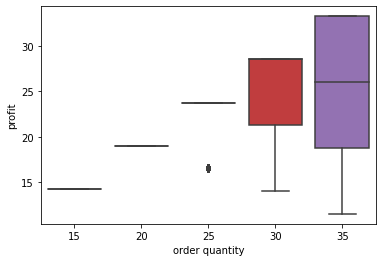

In [423]:
sns.boxplot(x='order quantity', y='profit',
             data=pd.melt(profit, var_name='order quantity', value_name='profit'));

Ожидаемая максимальная выгода при заказе 30 журналов, так как выгода сопоставима с максимально большим заказом — 35 шт. при меньшем риске (стандартное отклонение ниже).

# Вычисление оптимальной цены предложения

При определении цены в борьбе с конкурентами за проект двумя основными источниками неопределенности являются количество конкурентов и цены, предлагаемые каждым конкурентом. При высокой цене предложения можно заработать на проекте много денег, но самих проектов будет мало. При низкой цене предложения проектов будет немало, но денег каждый из них принесет немного. Оптимальная цена предложения находится где-то посередине. Удобным инструментом для определения цены предложения, максимально увеличивающей ожидаемую прибыль, является моделирование по методу Монте-Карло.

### Как определить, должна ли непрерывная случайная величина моделироваться как нормальная случайная величина?

Предположим, что наиболее вероятная цена предложения конкурента составляет 50 000 долларов. Напомним, что кривая плотности нормального распределения вероятностей является симметричной относительно среднего значения. Следовательно, для определения возможности применения нормальной случайной величины в моделировании цены предложения конкурента необходимо проверить симметрию относительно среднего значения цены предложения. Если цена предложения конкурента проявляет симметрию относительно среднего значения 50 000 долларов, цены предложения 40 000 и 60 000, 45 000 и 55 000, и т. д., должны быть приблизительно одинаково вероятны. Если предположение о симметрии кажется логичным, то цену предложения каждого конкурента можно смоделировать как нормальную случайную величину со средним значением 50 000 долларов.

### Как оценить стандартное отклонение цены предложения каждого конкурента? 

Напомним, что согласно эмпирическому правилу, наборы данных с симметричными гистограммами имеют примерно 95% данных в пределах двух стандартных отклонений от среднего значения. Аналогично, нормальная случайная величина с вероятностью 95% находится в пределах двух стандартных отклонений от своего среднего значения. Предположим, что с вероятностью 95% цена предложения конкурента составляет от 30000 до 70000 долларов. Это означает, что 2 × (стандартное отклонение цены предложения конкурента) равно 20 000 долларов или стандартное отклонение цены предложения конкурента равно 10 000 долларов.

### Как с помощью моделирования определить оптимальную цену предложения для проекта строительства?
Предположим, что вы участвуете в тендере на проект строительства, который будет стоить вам 25 000 долларов. Подготовка предложения на получение подряда стоит 1000 долларов. У вас имеется шесть потенциальных конкурентов, и вы подсчитали, что с вероятностью 50% каждый конкурент примет участие в тендере на проект.

Если конкурент подает предложение, то цена его предложения следует закону нормального распределения со средним значением 50 000 долларов и стандартным отклонением 10 000 долларов. Предположим также, что вы подготавливаете предложения только с ценой, кратной 5000 долларов. Какова должна быть цена вашего предложения для получения максимальной ожидаемой прибыли? Напомним, что выигрывает самая низкая цена предложения!

**Ваша стратегия должна быть следующей**
- Сгенерируйте количество конкурентов.
- Для каждого потенциального конкурента, который действительно подает предложение, смоделируйте предложение с помощью нормальной случайной величины. Если потенциальный конкурент не подает предложение, назначьте для него большую цену предложения (например, 100 000 долларов), которая обеспечит ему поражение.
- Определите, является ли цена вашего предложения самой низкой.
- Если вы предлагаете самую низкую цену, то получите прибыль, равную предложению минус стоимость проекта минус 1000 долларов (стоимость подачи предложения). Если цена вашего предложения не самая низкая, то вы теряете 1000 долларов — стоимость подачи предложения.
- Для моделирования каждой возможной цены предложения (например, 30 000, 35 000, ..., 60 000 долларов) тысячу раз используйте таблицу данных с двумя входами и затем выберите цену предложения с наибольшей ожидаемой прибылью.

***
Как изменится оптимальная цена предложения при наличии 12 потенциальных конкурентов?

In [492]:
from scipy.stats import binom

In [480]:
n = 12 # bidders count
mu, sigma = 50000, 10000
cost_project = 25000
cost_bid = 1000
my_bid = 40000
n_bidders = binom.rvs(12, 0.5, np.random.rand()) # critbinom

Если предположение о нормальном распределении логично, цену предложения конкурента можно теперь моделировать с помощью формулы `norm.isf(np.random.rand(), mu, sigma)`

In [484]:
norm.isf(np.random.rand(), mu, sigma) # norminv

47453.92086756208

In [487]:
bids = pd.DataFrame({'bidder': range(1, n+1),
                     'bid': [norm.isf(np.random.rand(), mu, sigma)
                                     if i < n_bidders else 100000 for i in range(n)]}) # 100000 is maxbid

In [488]:
bids

,bidder,bid
0,1,42601.183790
1,2,46322.940611
2,3,36425.433603
3,4,47525.321005
4,5,76002.316353
5,6,50702.914443
6,7,18914.495408
7,8,61614.608805
8,9,35087.582454
9,10,40507.245407


In [490]:
my_bid - cost_project - cost_bid if my_bid <= bids.bid.min() else -cost_bid # get profit

-1000

Cимулировние результата участия в тендере методом Монте-Карло

In [550]:
def tender_profit(cost_project, cost_bid, my_bid, bidders_count, bids_range):
    result = dict()
    
    def profit(bid, cost_project, cost_bid, bidders_count):
        min_bid = norm.isf(np.random.random(size=bidders_count), mu, sigma).min()
        return bid - cost_project - cost_bid if bid <= min_bid else -cost_bid
        
    for bid in tqdm(bids_range):
        result[bid] = [profit(bid,
                              cost_project,
                              cost_bid,
                              ) for _ in range(1000)]
    return pd.DataFrame(result)

In [559]:
bids_range = range(30_000, 65_000, 5000) # my bids from 30K to 60K
df = tender_profit(cost_project, cost_bid, my_bid, n_bidders, bids_range)

  0%|          | 0/7 [00:00<?, ?it/s]

In [560]:
df

,30000,35000,40000,45000,50000,55000,60000
0,4000,-1000,-1000,-1000,-1000,-1000,-1000
1,4000,9000,-1000,-1000,-1000,-1000,-1000
2,4000,-1000,-1000,-1000,-1000,-1000,-1000
3,-1000,-1000,14000,-1000,-1000,-1000,-1000
4,4000,-1000,-1000,-1000,-1000,-1000,-1000
...,...,...,...,...,...,...,...
995,4000,-1000,-1000,-1000,-1000,-1000,-1000
996,4000,-1000,14000,19000,-1000,-1000,-1000
997,4000,-1000,-1000,-1000,-1000,-1000,-1000
998,4000,9000,-1000,-1000,-1000,-1000,-1000


In [561]:
df.describe().loc['mean', :] # $35,000 bid maximizes mean profit $3960

30000    2945.0
35000    3960.0
40000    1580.0
45000    -540.0
50000   -1000.0
55000   -1000.0
60000   -1000.0
Name: mean, dtype: float64

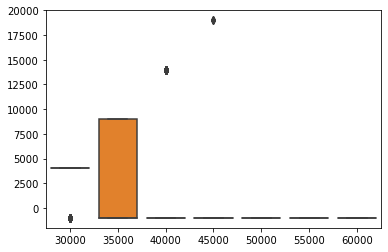

In [555]:
sns.boxplot(data=df);

Ставка в размере 35 000 долларов США максимизирует среднюю прибыль.

***
Предположим, что вы предлагаете цену за нефтяную скважину, которая, по вашей оценке, должна принести 40 млн долларов (включая стоимость разработки и добычи нефти). В торгах участвуют еще три конкурента, и предложение каждого конкурента предположительно соответствует закону нормального распределения со средним значением 30 млн долларов и стандартным отклонением 4 млн долларов. Какое предложение вы должны сделать (с точностью до 1 млн долларов)?

In [575]:
n_bidders = 3
profit = 40
mu, sigma = 30, 4
my_bid = 36
concur_bids = norm.isf(np.random.random(size=n_bidders), mu, sigma)

In [595]:
print(f'do I win?: {["no", "yes"][(win := my_bid >= concur_bids.max())]}')
print(f'Profit: {profit - my_bid and win}')

do I win?: no
Profit: False


Cимулировние результата участия в тендере методом Монте-Карло

In [598]:
def tender_profit(cost_project, my_bid, bidders_count, bids_range):
    result = dict()
    
    def profit(bid, cost_project, bidders_count):
        max_bid = norm.isf(np.random.random(size=bidders_count), mu, sigma).max()
        return cost_project - bid if bid >= max_bid else 0
        
    for bid in tqdm(bids_range):
        result[bid] = [profit(bid,
                              cost_project,
                              bidders_count) for _ in range(1000)]
    return pd.DataFrame(result)

In [603]:
bids_range = range(26, 37)
df = tender_profit(profit, my_bid, n_bidders, bids_range)

  0%|          | 0/11 [00:00<?, ?it/s]

In [604]:
df

,26,27,28,29,30,31,32,33,34,35,36
0,0,0,0,0,0,0,8,7,0,5,4
1,0,0,0,0,0,9,8,0,6,5,4
2,0,0,0,0,0,0,8,0,6,5,0
3,0,0,0,11,0,9,0,0,6,5,4
4,0,0,0,0,0,0,8,7,6,5,4
...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,10,0,8,0,0,0,4
996,0,0,0,0,0,0,0,0,6,5,4
997,0,0,0,0,0,0,0,0,0,0,4
998,0,0,0,0,0,9,8,0,0,5,4


In [605]:
df.describe().loc['mean', :] # looks like $35 million bid maximizes

26    0.028
27    0.143
28    0.408
29    0.583
30    1.320
31    1.782
32    2.432
33    3.213
34    3.564
35    3.670
36    3.232
Name: mean, dtype: float64

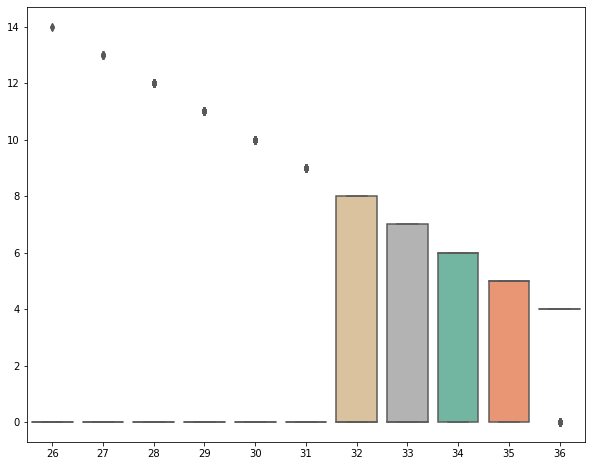

In [617]:
plt.subplots(figsize=(10,8))
sns.boxplot(data=df, palette="Set2");

***
Широко применяемая непрерывная случайная величина является случайной величиной, имеющей равномерное распределение. Случайная величина с равномерным распределением — записываемая как $U(a, b)$ — с равной вероятностью может принимать любое значение между двумя заданными числами: $a$ и $b$. Объясните, почему формулу `=a+(b-a)*СЛЧИС()` можно применять для моделирования $U(a, b)$.

In [618]:
a = 2
b = 10
rand = np.random.rand()

In [621]:
U = a + (b - a) * rand
U

6.355975860749496

Когда `rand()=0`, мы получаем, $a$ когда `rand()=1`, получаем $b$. Поскольку `rand()` одинаково вероятно
в промежутке в 0-1,  $U$ в равной степени будет где-то между $a$ и $b$.

***
Инвестор Питер Фишер предлагает цену за биотехническую компанию. Компания с равной вероятностью может стоить от 0 до 200 долларов за акцию. Только сама компания знает свою истинную стоимость. Питер настолько известный инвестор, что рынок немедленно оценит стоимость компании на 50% больше ее истинной стоимости. Какую цену должен предложить Питер за акцию компании?

In [622]:
min_cost, max_cost = 0, 200
rand = np.random.rand()
worth_cost = min_cost + rand * max_cost
value_after_buy = 1.5 * worth_cost
bid = 50

In [628]:
print(f'bid accepted?: {["no", "yes"][bid >= worth_cost]}')
print(f'profit: {(profit := value_after_buy - bid) if profit > 0 else 0}')

bid accepted?: no
profit: 0


Cимулировние размера ставки Питера с помощью метода Монте-Карло

In [672]:
def buy_profit(bids_range):
    result = dict()
        
    for bid in tqdm(bids_range):
        worth_costs = (min_cost + np.random.random(size=1000) * max_cost)
        profit = np.where(bid >= worth_costs, worth_costs * 1.5 - bid, 0)
        result[bid] = profit
    return pd.DataFrame(result)

In [673]:
df = buy_profit(np.linspace(0, 200, 9).astype(int))

  0%|          | 0/9 [00:00<?, ?it/s]

In [674]:
df.describe().loc['mean', :] # The more you bid the more you lose so bid nothing

0       0.000000
25     -0.619897
50     -3.570396
75     -6.503730
100   -13.241682
125   -20.185984
150   -26.235828
175   -36.187742
200   -52.820119
Name: mean, dtype: float64

Чем больше предложение, тем больше потери, таким образом лучше ничего не покупать.

***
Ичиро Сузуки (Ichiro Suzuki), игрок бейсбольной команды Seattle Mariners, приглашен на арбитраж по повышению своей зарплаты. Процедура арбитража в Высшей бейсбольной лиге проходит следующим образом: игрок представляет на рассмотрение размер зарплаты, которую, по его мнению, ему должны платить, то же самое делает команда. Арбитр (не видя размера зарплат, представленных игроком или командой) оценивает истинную зарплату. Игрок получает ту из предложенных зарплат, которая ближе к оценке арбитра. Например, предположим, что Ичиро представил на рассмотрение зарплату в 12 млн долларов, а команда Seattle Mariners — 7 млн долларов. Если арбитр скажет, что истинная зарплата равно 10 млн долларов, Ичиро получит свои 12 миллионов, тогда как, если арбитр скажет, что истинная зарплата равна 9 млн долларов, Ичиро получит только 7 миллионов. Предположим, что оценка арбитра с равной вероятностью находится где-то между 8 и 11 млн долларов, а предложение команды с равной вероятностью составляет от 6 до 9 млн долларов. Какую зарплату должен предложить Ичиро с точностью до 1 млн долларов?

In [698]:
ichiro_asks_for = 12
arbiter_offer = 8 + 3 * np.random.rand()
team_offer = 6 + 3 * np.random.rand()
team_minus_arbiter = abs(team_offer - arbiter_offer)
ichiro_minus_arbiter = abs(ichiro_asks_for - arbiter_offer)

print(f'winner: {["ichiro", "team"][(win := ichiro_minus_arbiter < team_minus_arbiter)]}\n'
      f'ichiro gets: {team_offer if win else ichiro_asks_for}'
     )

winner: team
ichiro gets: 6.5439241018968755


Cимулировние размера зарплатных ожиданий Ичиро с помощью метода Монте-Карло

In [721]:
def sim_offer(ask_range):
    result = dict()
        
    for ask in tqdm(ask_range):
        arbiter_offer = 8 + 3 * np.random.random(size=1000)
        team_offer = 6 + 3 * np.random.random(size=1000)
        team_minus_arbiter = np.abs(team_offer - arbiter_offer)
        ichiro_minus_arbiter = abs(ask - arbiter_offer)
        winner = np.where(ichiro_minus_arbiter < team_minus_arbiter, ask, team_offer)
        result[ask] = winner
    return pd.DataFrame(result)

In [722]:
df = sim_offer(np.linspace(10, 12, 5))

  0%|          | 0/5 [00:00<?, ?it/s]

In [723]:
df

,10.0,10.5,11.0,11.5,12.0
0,8.436847,10.500000,11.000000,11.500000,12.000000
1,8.702740,10.500000,11.000000,11.500000,6.819606
2,7.964411,10.500000,11.000000,6.736300,6.221083
3,10.000000,10.500000,11.000000,11.500000,12.000000
4,10.000000,8.192437,11.000000,6.892511,12.000000
...,...,...,...,...,...
995,10.000000,6.657196,11.000000,8.405787,12.000000
996,10.000000,7.800096,11.000000,7.798985,8.603676
997,8.252665,10.500000,11.000000,11.500000,12.000000
998,10.000000,10.500000,8.759085,6.469745,8.352171


In [724]:
df.describe().loc['mean', :] # looks like 11 million maximizes mean profit 

10.0    9.483127
10.5    9.576317
11.0    9.738827
11.5    9.606588
12.0    9.536293
Name: mean, dtype: float64

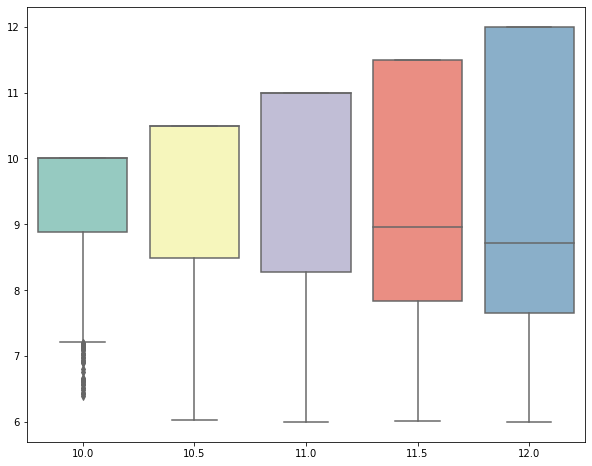

In [725]:
plt.subplots(figsize=(10,8))
sns.boxplot(data=df, palette="Set3");

Похоже, что предложение зарплаты в 11 миллионов максимизирует вероятность получить максимальный оффер.

# Моделирование цен на акции и распределения средств между активами

Последние несколько лет показали, что будущие доходы от инвестиций являются весьма неопределенными. Многие финансовые эксперты критикуют использование логарифмически нормальной случайной величины для моделирования цен на акции, поскольку логарифмически нормальное распределение недооценивает вероятность экстремальных событий (которые часто называют "черными лебедями"). В этой главе рассматривается относительно простой подход к оценке неопределенности будущих доходов от инвестиций. Этот подход основан на идее бутстреппинга. По существу, идея бутстреппинга при моделировании будущих доходов от инвестиций состоит в предположении, что будущее подобно прошлому. Например, если необходимо смоделировать цену акции GE через год, можно предположить, что ежемесячное относительное изменение цены — это с равной вероятностью относительное изменение цены в один из предыдущих 60 месяцев. Этот метод позволяет быстро сгенерировать тысячи сценариев для будущей стоимости инвестиций. Кроме того, в сценариях, предполагающих, что будущие изменчивость и среднее значение доходов подобны прошлым, можно легко отразить мнение о том, что будущие доходы от инвестиций будут меньше или больше, чем в недавнем прошлом.

**Я недавно купил 100 акций компании GE. Какова вероятность того, что в течение следующего года эта инвестиция принесет доход более 10%?**

Предположим, что акции GE в настоящее время продаются по 28,50 долларов за акцию. Данные о ежемесячных доходах по акции GE (а также по акции Microsoft и Intel) для периода времени с августа 1997 г. по июль 2002 г. находятся в файле Gesim.xlsx. Например, в месяце, заканчивающемся 2 августа 2002 г. (по существу, это июль 2002 г.), акция GE потеряла в цене 12,1%. Эти доходы включают дивиденды (если таковые имеются), выплачиваемые каждой компанией.

Цена на акцию GE через год не определена. Так каким образом можно получить представление о диапазоне изменения цены на акцию GE в течение года, начиная с текущего момента? Бутстреппинг позволяет оценить доход по акции GE для каждого из следующих 12 месяцев на основе предположения о том, что доход в каждом месяце с одинаковой вероятностью может быть равен доходу в любом из перечисленных 60 месяцев.

**Я пытаюсь распределить мой инвестиционный портфель между акциями, казначейскими векселями и облигациями. Какое распределение средств между активами в рамках пятилетнего горизонта планирования принесет ожидаемый доход не менее 10% и минимизирует риск?** 

Ключевым решением, принимаемым отдельными лицами, менеджерами открытых фондов и другими инвесторами, является распределение средств между различными классами активов с учетом будущей неопределенности доходов для этих классов активов. Разумный подход к распределению средств между активами состоит в применении бутстреппинга при генерации одной тысячи смоделированных значений для будущих стоимостей каждого класса активов.

***
Данные к заданиям 1—3 находятся в файле Gesim.xlsx.
1. Пусть текущая цена акции Microsoft составляет 28 долларов. Какова вероятность того, что через два года акция Microsoft будет стоить не менее 35 долларов?

In [732]:
gesim = pd.read_excel('~/Study/excel/Ch75/Practice Files/Gesim.xlsx',
                      skiprows=3, usecols=range(2,6), names=['Date', 'MSFT', 'INTC', 'GE']).dropna()

In [734]:
gesim.head()

,Date,MSFT,INTC,GE
0,2002-08-02,-0.083160,-0.153969,-0.121118
1,2002-07-02,-0.122852,0.028493,0.108434
2,2002-06-02,0.074445,-0.338528,-0.061389
3,2002-05-02,-0.025832,-0.034640,-0.012759
4,2002-04-02,-0.133477,-0.058940,-0.156578


In [735]:
start_price = 28
return_sample = gesim.MSFT.sample(12, replace=True)

In [750]:
return_sample

24    0.000000
42   -0.142057
18   -0.033737
26    0.278772
7    -0.038340
41    0.193819
54    0.136193
11   -0.103067
8     0.031771
43    0.261716
22    0.141933
11   -0.103067
Name: MSFT, dtype: float64

In [779]:
sim = []
for _ in range(1000):
    start_price = 28
    return_sample = gesim.MSFT.sample(12, replace=True)
    end_price = [(start_price := (1 + x) * start_price) for x in return_sample][-1]
    sim.append(end_price)

In [782]:
sum(x >= 35 for x in sim) / 1000 # Prob >= $35

0.366

Вероятность того, что через два года акция Microsoft будет стоить не менее 35 долларов около 37%

2. Выполните задание 1 с предположением, что в течение следующих двух лет доход по акциям Microsoft в среднем будет на 6% в год выше, чем в период с 1997 по 2002 гг., для которого имеются исторические данные.

In [789]:
sim = []
for _ in range(1000):
    start_price = 28
    return_sample = gesim.MSFT.sample(12, replace=True)
    end_price = [(start_price := (1 + x) * start_price) for x in return_sample][-1]
    sim.append(end_price - 0.06 * 28) # took off 6% of initial price here

In [791]:
sum(x >= 35 for x in sim) / 1000 # Prob >= $35

0.315

Если применить предположение о том, что доход по акциям в среднем будет на 6% в год выше, чем в период с 1997 по 2002 гг, вероятность составила 31%.

3. Предположим, что текущая цена акции Intel составляет 20 долларов. Какова вероятность того, что в течение следующих трех лет доход от приобретения акции Intel составит не менее 30% (для трехлетнего периода)?

Определение годового дохода за трехлетний моделируемый период для каждого созданного сценария. Обратите внимание, что (1 + годовой доход)^3 = (окончательная стоимость портфеля)/(начальная стоимость
портфеля). Так как начальная стоимость портфеля равна 1 доллару, то годовой доход равен (окончательная стоимость портфеля)^1/3 – 1.

In [792]:
sim = []
years = 3
months = 12 * years
for _ in range(1000):
    start_price = 20
    return_sample = gesim.INTC.sample(months, replace=True)
    end_price = [(start_price:=(1 + x) * start_price) for x in return_sample][-1]
    sim.append((end_price / 20) ** (1/years) - 1) # annual return

In [793]:
sum(x >= .3 for x in sim) / 1000 # Prob > 30% annual return

0.151

Вероятность около 15%, что годовая прибыль будет больше 30%.

***
Определите взаимосвязь (на основе данных за 1973—2009 гг.) между годовыми доходами по акциям, векселям и облигациям. Затем определите взаимосвязь (на основе тысячи сценариев, созданных с помощью бутстреппинга) между окончательной стоимостью акций, векселей и облигаций. Не кажется ли вам, что подход с использованием бутстреппинга позволяет быстро определить взаимозависимость между доходами по акциям, векселям и облигациям?

In [1056]:
assetallsim = pd.read_excel('~/Study/excel/Ch75/Practice Files/Assetallsim.xlsx',
                      skiprows=6, usecols=range(4)).dropna()

In [1058]:
assetallsim.head()

,Year,Stocks,T.Bills,T.Bonds
0,1973.0,-0.1431,0.0507,0.0366
1,1974.0,-0.2590,0.0745,0.0199
2,1975.0,0.3700,0.0715,0.0361
3,1976.0,0.2383,0.0544,0.1598
4,1977.0,-0.0698,0.0435,0.0129


In [1059]:
years = 5
start_price = 1
return_sample = assetallsim.sample(years, replace=True)

In [1103]:
sim = dict()
columns = ['Stocks', 'T.Bills', 'T.Bonds']

for column in columns:
    prices = []
    
    for _ in range(1000):
        start_price = 1
        return_sample = assetallsim[column].sample(years, replace=True)
        # values = return_sample[column]
        end_price = [(start_price:=(1 + x) * start_price) for x in return_sample][-1]
        prices.append(end_price ** (1/years) - 1)
    sim[column] = prices

simulated = pd.DataFrame(sim)

In [1105]:
simulated

,Stocks,T.Bills,T.Bonds
0,0.117465,0.029587,0.102367
1,0.072599,0.140185,0.035539
2,0.094647,0.053246,0.019545
3,0.094746,0.067326,0.065628
4,0.027027,0.058715,0.034469
...,...,...,...
995,0.089222,0.045030,0.054787
996,0.123532,0.053937,0.086833
997,0.267552,0.067559,0.067888
998,0.112910,0.066206,0.094675


In [1075]:
assetallsim[columns].corr() # Correlations of actual annual returns

,Stocks,T.Bills,T.Bonds
Stocks,1.000000,-0.403120,0.271472
T.Bills,-0.403120,1.000000,0.068434
T.Bonds,0.271472,0.068434,1.000000


In [1104]:
simulated[columns].corr() # Correlations of simulated 5 year returns

,Stocks,T.Bills,T.Bonds
Stocks,1.000000,0.029969,-0.025698
T.Bills,0.029969,1.000000,0.011678
T.Bonds,-0.025698,0.011678,1.000000


Мы видим, что корреляции очень похожи между реальным и смоделированным годовыми доходностями.

# Моделирование вероятностей для азартных игр и спортивных соревнований
Азартные игры и просмотр спортивных соревнований являются популярным времяпрепровождением. Я полагаю, азартные игры и спорт захватывают, поскольку никогда неизвестно, что произойдет дальше. Для аппроксимирования вероятностей наступления событий в азартных играх и спортивных соревнованиях подходит такой мощный инструмент, как моделирование по методу Монте-Карло. По существу, он оценивает вероятность путем многократного повторения игровой или соревновательной ситуации. Если, например, сыграть в кости 10 000 раз, выиграв 4900 раз, то вероятность выигрыша можно будет оценить как 4900/10 000 или 49%. Если сымитировать баскетбольный мужской Финал Четырех Национальной студенческой спортивной ассоциации 2003 г. тысячу раз и при этом команда Сиракьюсского университета выиграет 300 раз, то вероятность победы в чемпионате составит 300/1000 или 30%.

### Какова вероятность выигрыша в кости?
В игре в кости игрок бросает два кубика. Если выпадает 2, 3 или 12, игрок проигрывает. Если выпадает 7 или 11, игрок выигрывает. Если выпадает другая комбинация, игрок продолжает бросать кубики до тех пор, пока не выпадет число очков, выпавшее при первом броске (называемое "пойнт"), или 7. Если "пойнт" выпало раньше 7, игрок выигрывает. Если 7 выпало раньше, игрок проигрывает. Путем сложных вычислений можно показать, что вероятность выигрыша при игре в кости составляет 0,493. Для аппроксимирования этой вероятности можно сымитировать игру в кости множество раз (2000 раз в данном примере).

Важно помнить, что в этой игре заранее неизвестно, сколько бросков потребуется для ее завершения. Пример показывает, что игра с числом бросков более 50 крайне маловероятна, поэтому, предположим, что игра состоит из 50 бросков. После каждого броска состояние игры определяется следующим образом:
- 0 — игра проиграна;
- 1 — игра выиграна;
- 2 — игра продолжается.

Для 2000 итераций выигрыш составил 49,15%. При большем числе испытаний (например, в случае 10 000 итераций) процент выигрыша приблизится к истинной вероятности выигрыша в игре в кости (49,3%).

### Какова вероятность получения "тройки" в пятикарточном покере?

Обычная колода карт содержит по четыре карты каждого ранга: четыре туза, четыре двойки и т. д. до четырех королей. Для вычисления вероятности получения конкретной покерной комбинации можно присвоить тузу значение 1, двойке значение 2 и т. д. до валета, которому присваивается значение 11, даме присваивается значение 12 и королю — значение 13.

В пятикарточном покере необходимо собрать комбинацию из пяти карт. Здесь многие вероятности представляют интерес, но ограничимся оценкой вероятности получения "тройки", для чего требуются три карты одного ранга и отсутствие пары. (Если у вас есть пара карт одного ранга и три карты другого ранга, то вы держите в руках "фулл хауз".) Для имитации игры в пятикарточный покер необходимо выполнить приведенные далее шаги.

1. Свяжите с каждой картой в колоде случайное число.
2. Пять выбранных карт будут пятью картами, связанными с самыми маленькими случайными числами, благодаря чему каждая карта может быть выбрана с равной вероятностью.
3. Подсчитайте, сколько карт каждого ранга (от туза до короля) выбрано.

Вероятность появления "тройки" карт составляет 1,9%. (С помощью теории вероятности можно доказать, что истинное значение вероятности получения "тройки" карт равно 2,1%.)

### Какова вероятность выигрыша для каждой команды в баскетбольном Финале Четырех Национальной студенческой спортивной ассоциации?

Уважаемый рейтинг Сагарина (см. сайт sagarin.com) всегда предоставляет актуальные рейтинги для всех студенческих баскетбольных команд. Накануне Финала Четырех 2003 года рейтинги Сагарина были следующими: 91,03 для Сиракьюсского университета (во главе с Кармело Энтони); 92,76 для Канзасского университета; 89,01 для Маркетского университета (во главе с Дуэйном Уэйдом) и 90,66 для Техасского университета. На основе этой информации для оценки шансов каждой команды на выигрыш можно сыграть Финал Четырех несколько тысяч раз.

Средний прогноз для количества очков, которое выигрывает команда хозяев, равен рейтинг фаворита – рейтинг аутсайдера. В Финале Четырех нет команды хозяев, но если бы она была, к рейтингу команды хозяев следовало бы добавить пять очков. (В профессиональном баскетболе хозяевам добавляют четыре очка, а в студенческом и профессиональном футболе — три очка.) Затем можно смоделировать результат каждой игры.

Для вычисления прогнозируемой вероятности победы каждой команды: 37% для "Канзаса", 27% для "Сиракуз", 22% для "Техаса" и 14% для "Маркетта". Эти вероятности могут быть переведены в букмекерский коэффициент по следующей формуле: перевес = вероятность_поражения_команды / вероятность_победы_команды. Например, коэффициент на победу "Канзаса" составляет 1,63 к 1: (1 – 0,37) : 0,37 = 1,63

Это означает, что если поставить на победу "Канзаса" 1 доллар, и букмекер заплатит 1,63 доллара, то ставка будет справедливой. Безусловно, букмекер слегка снизит шансы для обеспечения собственных интересов.